<center> <font color="blue"><h1>  Computer Lab : Quantile Regression </h1> </center>

<center> <h3> Done by :Saif Eddine GHRIBI & Mohamed Skander HELLAL </h3> </center>

# TABLE OF CONTENTS

[1. Data](#Data)<br>
[2. Quantile regression with linear kernels](#Quantile)<br>
[3. Implementation](#Implementation)<br>



<a id='Data'></a>
## 1. Data

In [1]:
from census_dataset import load_data
import numpy as np
import matplotlib.pyplot as plt
import random 
from scipy.optimize import check_grad
import time

In [2]:
X_train, X_test, y_train, y_test = load_data(test_size=0.99)
y_train = y_train.reshape(y_train.shape[0],1)
print(np.shape(X_train))

(50373, 10)


<a id='Quantile'></a>
## 2. Quantile regression with linear kernels

### Question 2.1
<p> For $\tau \in [0,1]$, let's us consider the pinball loss defined as $L_{\tau}(v) = max(-(1-\tau)v,\tau v)$ </p>
<p> Calculate $L_{\tau}^* ,\,$ $prox_{\gamma L_{\tau}^*}(v) \,$ and $ \,prox_{\gamma L_{\tau}}(v) \:$ for $\gamma > 0$ </p>

#### ANSWER

 We have $$ L_{\tau}(v) = max(-(1-\tau)v,\tau v) = \begin{cases} & -(1-\tau)v &\mathrm{if} v\leq 0, 
         \\ & \tau v &\mathrm{if} v >0 
\end{cases}$$ 

<p>The $L_{\tau}$ Legendre Transformation  can be written as follows : 
   $$ L_{\tau}^*(\phi) =  \operatorname*{sup}_{v} (\langle \phi ,v \rangle - L_{\tau}(v)) =\operatorname*{sup}_{v} (\phi v - L_{\tau}(v)) $$ </p>

<p> $\bullet$ <b> First Case : if $\phi > \tau$ and v>0</b>  </p>
<p> We can write  $L_{\tau}$ Legendre Tranformation :
    $$ L_{\tau}^*(\phi) = \operatorname*{sup}_{v} ((\phi - \tau ) v) $$
As  $\phi > \tau$ We can conclude that : 
    $$ L_{\tau}^*(\phi) = +\infty$$
    </p>

<p> From the first case, we can conclude that for $\phi > \tau$ we have $ L_{\tau}^*(\phi) = +\infty$. We do not need to check the case of v $\leq$ 0 </p>

<p> $\bullet$ <b> Second Case : if $\phi < -(1-\tau)$ and v $\leq$ 0 </b> </p>
<p> We can write  $L_{\tau}$ Legendre Tranformation :
    $$ L_{\tau}^*(\phi) = \operatorname*{sup}_{v} ((\phi + 1 - \tau ) v) $$
As  $\phi < -(1-\tau)$ We can conclude that : 
    $$ L_{\tau}^*(\phi) = +\infty$$
    </p>
<p> From the second case, we can conclude that for $\phi < -(1-\tau)$ we have $ L_{\tau}^*(\phi) = +\infty$. We do not need to check the case of v > 0 </p> 

<p> $\bullet$ <b> Third Case : if $-(1-\tau) \leq \phi \leq \tau$</b> </p>
<p> $ \quad\bullet$ <b> if v> 0 :</b>
    $$ L_{\tau}^*(\phi) = \operatorname*{sup}_{v} ((\phi-\tau ) v) $$
$\qquad$As  $\phi \leq \tau$ We can conclude that : 
    $$ L_{\tau}^*(\phi) = 0$$
<p> $ \quad\bullet$ <b> if v $\leq$ 0 :</b>
    $$ L_{\tau}^*(\phi) = \operatorname*{sup}_{v} ((\phi+1-\tau ) v) $$
$\qquad$As  $-(1-\tau) \leq \phi$ We can conclude that : 
    $$ L_{\tau}^*(\phi) = 0$$  
<p> From the third case, we can conclude that for $-(1-\tau) \leq \phi \leq \tau$: $$L_{\tau}^*(\phi) = 0$$</p>     
</div>

CONCLUSION
$$ L_{\tau}^{*}(v) =\begin{cases} & +\infty &\mathrm{if} \phi < -(1-\tau) 
         \\ & 0 &\mathrm{if}-(1-\tau) \leq \phi \leq \tau
         \\ & +\infty &\mathrm{if} \phi > \tau 
\end{cases}$$ </p>

####  ANSWER
 We have : $$ prox_{\gamma L_{\tau}^*}(v) = \operatorname*{argmin}_{t}(\gamma L_{\tau}^*(t) + \frac{1}{2}(t-v)^{2}) $$ 
However from the previous result obtained, we can obtain : 
        $$ prox_{\gamma L_{\tau}^*}(v) = \operatorname*{argmin}_{-(1-\tau) \leq t \leq \tau}(\frac{1}{2}(t-v)^{2}) = \operatorname*{argmin}_{-(1-\tau) \leq t \leq \tau}((t-v)^{2}) $$ 
    
 <p> $\bullet$ <b> First Case : if $v >\tau$ </b>
 $$ -(1-\tau) - v \leq t-v \leq \tau -v \leq 0 $$</p>  
 $\qquad$ Then :  $$(\tau -v)^2 \leq (t-v)^2 \leq(1-\tau + v)^2 $$  
 $\qquad$ As a result : $$ prox_{\gamma L_{\tau}^*}(v) = \tau $$ </p>
 
 <p> $\bullet$ <b> Second Case : if $v <-(1-\tau)$ </b>
 $$  0 \leq -(1-\tau) - v \leq t-v \leq \tau -v  $$</p>  
 $\qquad$ Then :  $$ (-(1-\tau) - v)^2 \leq (t-v)^2 \leq (\tau -v) ^2 $$  
 $\qquad$ As a result : $$ prox_{\gamma L_{\tau}^*}(v) = -(1-\tau) $$ </p>
 
 <p> $\bullet$ <b> Third Case : if $-(1-\tau) \leq v \leq \tau$ </b> </p>
    
<p> $\qquad$ Then :  $(t-v)^2$ minimum is zero.As a result : $$ prox_{\gamma L_{\tau}^*}(v) = v $$ </p>

#### CONCLUSION
$$  prox_{\gamma L_{\tau}^*}(v) =\begin{cases} & -(1-\tau) &\mathrm{if} v < -(1-\tau) 
         \\ & v &\mathrm{if}-(1-\tau) \leq v \leq \tau
         \\ & \tau &\mathrm{if} v > \tau 
\end{cases}$$ </p>

#### ANSWER


<p> We have : $$ prox_{\gamma L_{\tau}}(v) = \operatorname*{argmin}_{t}(\gamma L_{\tau}(t) + \frac{1}{2}(t-v)^{2}) $$ </p>

<p> Let's denote by f the function defined as follows:
    $$ f(t) = \frac{1}{2}(t-v)^{2} $$

<p> Using <b> Fermat Rule </b>, we have 
    $$ t^{*} \in \operatorname*{argmin}_{t}(\gamma L_{\tau}(t) +f(t)) \Leftrightarrow 0 \in \partial(\gamma L_{\tau}(t^*) +f(t^*)) $$</p> 

<p> However dom(f) =  $\mathbb{R}$ and dom($\gamma L_{\tau}$) = $\mathbb{R}$.From the results obtained,we can deduce that ri(dom(f) - dom(g))=$\mathbb{R}$ </p>  

<p>As 0 $\in$  ri(dom(f) - dom(g)),we can deduce: 
    $$\partial(\gamma L_{\tau}(t^*) +f(t^*)) = \partial(\gamma L_{\tau}(t^*))+ \partial f(t^*))$$ </p>
    $$ \partial f(t^*) = f'(t^*) = t^*-v $$ 
    $$   \partial(\gamma L_{\tau}(t^*)) =\begin{cases} & -\gamma(1-\tau) &\mathrm{if} t^* <0 
         \\ & \gamma\tau &\mathrm{if} t^* >0
         \\ & [-\gamma(1-\tau),\gamma\tau] &\mathrm{if} t^* = 0
\end{cases}$$ </p>

<p> $\bullet$ <b> First Case : if $t^* < 0$ </b>
    $$ 0 = t^*-v -\gamma(1-\tau) \enspace,\enspace t^* <0 $$
    $$ \Leftrightarrow t^* = v+ \gamma(1 -\tau)   \enspace,\enspace v < -\gamma(1-\tau)$$ 
    
<p> $\bullet$ <b> Second Case : if $t^* > 0$ </b>
    $$ 0 = t*-v +\gamma \tau \enspace,\enspace t^* >0 $$
    $$ \Leftrightarrow t^* = v -\gamma \tau   \enspace,\enspace v > \gamma\tau$$     

<p> $\bullet$ <b> Third Case : if $t^* = 0$ </b>
    $$ t^*=0 \enspace,\enspace v \in [-\gamma(1-\tau),\gamma\tau] $$
         

#### CONCLUSION
$$  prox_{\gamma L_{\tau}}(v) =\begin{cases} &v+ \gamma(1-\tau) &\mathrm{if} v < -(1-\tau) 
         \\ & v-\gamma\tau &\mathrm{if} v>\gamma\tau
         \\ & 0&\mathrm{if} v \in [-\gamma(1-\tau),\gamma\tau] 
\end{cases}$$ </p>

### Question 2.2
Define  $ \begin{array}{ccccc}
                      & & g : (w,w_{0}) & \mapsto & \frac{\alpha}{2}\Vert w \Vert^2 \\  
                   \end{array}$. 
Calculate $prox_{\gamma g}((w,w_{0})) $                  

#### ANSWER
<p> We have :
$$ prox_{\gamma g}((w,w_{0})) = \operatorname*{argmin}_{(t,t_{0})}(\frac{\gamma\alpha}{2}\Vert t \Vert^2 + \frac{1}{2}\Vert (t,t_{0}) -(w,w_{0}) \Vert^2) = \operatorname*{argmin}_{(t,t_{0})}(\frac{\gamma\alpha}{2}\Vert t \Vert^2 +\frac{1}{2}(t_{0}-w_{0})^2+\frac{1}{2}\Vert t-w \Vert^2) $$</p>
<p> we can see we have two separable functions, so we are going to compute the argmin for each one of them</p> 
<p> <p> Using <b> Fermat Rule </b>, we have 
    $$ t_{0}^{*} \in \operatorname*{argmin}_{t_{0}}(\frac{\gamma\alpha}{2}\Vert t \Vert^2 +\frac{1}{2}(t_{0}-w_{0})^2+\frac{1}{2}\Vert t-w \Vert^2) \Leftrightarrow 0 = t^*_{0}-w_{0} \Leftrightarrow t^*_{0}=w_{0}  $$</p> 
    $$ t^{*} \in \operatorname*{argmin}_{t}(\frac{\gamma\alpha}{2}\Vert t \Vert^2 +\frac{1}{2}(t_{0}-w_{0})^2+\frac{1}{2}\Vert t-w \Vert^2) \Leftrightarrow 0 = \gamma\alpha t^* + t^*-w  \Leftrightarrow t^*=\frac{w}{1+\gamma\alpha} $$</p> 

#### CONCLUSION
$$  prox_{\gamma g}((w,w_{0})) = \begin{pmatrix}
                    \frac{w}{1+\gamma\alpha} \\ 
                    w_{0} \\
                    \end{pmatrix}$$

### Question 2.3
For z $\in$ $\mathbb{R}^n$,denote $\mathbb{L}_{\tau}(z) =\sum_{i=1}^{n}L_{\tau}(z_{i})$  and e = $\begin{pmatrix}
                    1   
                    ,\ldots, 
                     1 
\end{pmatrix}$. Show that :
$$ 
\begin{aligned}
\operatorname*{min}_{w \in \mathbb{R}^d, w_{0} \in \mathbb{R}} \frac{\alpha}{2}\Vert w \Vert^2 + \mathbb{L}_{\tau}(y-xw-w_{0}e )
&=\operatorname*{min}_{w \in \mathbb{R}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) \\
&= \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)\\
&= \operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz
\end{aligned}
$$

#### ANSWER
<p>We have dom($L_{\tau}$) = $\mathbb{R}$ , So dom($\mathbb{L}_{\tau}$) =$\mathbb{R}^n$.As a result, ri(dom($\mathbb{L}_{\tau}$)= $\mathbb{R}^n$ </p>
<p> As ri(dom($\mathbb{L}_{\tau}$)= $\mathbb{R}^n$, $\partial L_{\tau}(y-xw-w_{0}e)\ne \emptyset$.$\enspace$As a result,using <b>Fenchel Young </b>, $\exists z \in  \partial L_{\tau}(y-xw-w_{0}e)$ such that :
$$ L_{\tau}(y-xw-w0e) = <z,y-xw-w_{0}> - L_{\tau}^*(z)$$  </p>
<p> Therefore, $$ \frac{\alpha}{2} \Vert w \Vert ^2 + L_{\tau}(y-xw-w_{0}e) = \frac{\alpha}{2} \Vert w \Vert ^2 + z^T(y-xw-w_{0})-L_{\tau}^*(z)$$ </p>

<p> As a result, $$ \frac{\alpha}{2} \Vert w \Vert ^2 + L_{\tau}(y-xw-w_{0}e) = \operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e)$$ </p>

<p>Then, $$ \operatorname*{min}_{w \in \mathbb{R}^d, w_{0} \in \mathbb{R}} \frac{\alpha}{2}\Vert w \Vert^2 + \mathbb{L}_{\tau}(y-xw-w_{0}e )
=\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e)$$ </p> 



#### CONCLUSION
<p>$$ \operatorname*{min}_{w \in \mathbb{R}^d, w_{0} \in \mathbb{R}} \frac{\alpha}{2}\Vert w \Vert^2 + \mathbb{L}_{\tau}(y-xw-w_{0}e )
=\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e)$$ </p> 

####  ANSWER
<p> We have $$ \frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) 
               = \frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z)+ z^T y -<M.(w,w_{0}),z> $$ </p>
<p> Where M is the matrix X with an additionnal column of ones : M=(X,e) </p>   
<p> Now if we consider a function g defined as follows : 
    $$  g(v) = L_{\tau}(y-v)$$ </p>
    
<p>    $$\begin{aligned}
    g^*(z) &=\operatorname*{sup}_{v} <z,v> - L_{\tau}(y-v)\\
           &=\operatorname*{sup}_{v} <z,y-v> - L_{\tau}(v)\\
           &=<z,y> + \operatorname*{sup}_{v} <-z,v> - L_{\tau}(v)\\
           &= z^Ty +L_{\tau}^*(-z)
           \end{aligned}
           $$ </p>
           
<p> However, we have : 
    $$ \operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z)+ z^T y - <M(w,w_{0}),z> = \operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(-z)-z^T y - <M.(w,w_{0}),-z>$$ </p>
    
<p> However, 
    $$ \frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(-z)-z^T y - <M.(w,w_{0}),-z> = f(w,w_{0}) + <M.(w,w_{0}),z> -g^*(z) $$ </p>

 However, $$ dom(f) = \mathbb{R}^{d+1}\enspace ,\enspace dom(g) = \mathbb{R}^n$$ </p>
 <p> As a result,  $$ Mdom(f) - dom(g) =\mathbb{R}^n$$ 
                   $$ 0 \in ri(M'dom(f) - dom(g))$$
 </p>
<p> From  the previous result we can conclude that 
    $$\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(-z)-z^T y - <M.(w,w_{0}),-z> = \operatorname*{max}_{z \in \mathbb{R}^n}\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(-z)-z^T y - <M.(w,w_{0}),-z>$$ </p>
<p> And     
   $$ \operatorname*{max}_{z \in \mathbb{R}^n}\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(-z)-z^T y - <M.(w,w_{0}),-z> = \operatorname*{max}_{z \in \mathbb{R}^n}\operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z)+z^T y - <M.(w,w_{0}),z> $$ </p>
   
<p> Now we are going to compute 
    $$ \operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z)+z^T y - <M.(w,w_{0}),z> = \operatorname*{min}_{w \in \mathbb{w}^d, w_{0}\in \mathbb{R}}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e)$$ </p>
    
<p> Let's denote by h the function defined as follows :
    $$ h(w,w_{0}) = \frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) $$ </p>
<p> As the function is differentiable , we are going to calculate the gradient to obtain the minimum    
    $$ \nabla_{w}h(w,w_{0})= \alpha w -x^Tz = 0$$
    $$ \nabla_{w_{0}}h(w,w0) = z^Te = 0$$ </p>
<p> As a result 
    $$ w = \frac{x^Tz}{\alpha}$$
    $$ z^Te = 0 $$
    </p>
<p> Let's define 
    $$  \iota_{0}(e^Tz) =\begin{cases} &0 &\mathrm{if} e^Tz = 0 
         \\ & +\infty & otherwise 
\end{cases}$$ </p>

<p> From the different results obtaine we obtain
    $$\operatorname*{min}_{w \in \mathbb{R}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) 
= \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)$$ </p>
<p> Using $\iota_{0}(e^Tz)$ in $\operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)$ as we the expression contains $-\iota_{0}(e^Tz)$ and  we are dealing with a maximisation problem  </p>

#### CONCLUSION

$$\operatorname*{min}_{w \in \mathbb{R}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) 
= \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)$$

#### ANSWER
<p> Let's denote by h the function defined as follows
    
$$h(u)= y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz$$ </p>
<p> h is a differentiable function.Therefore, to compute $ \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz$, we are going to calcute the gradient of h
$$ \nabla_{u} h(u) = e^Tz = 0 $$ </p>

<p> <p> Let's define 
    $$  \iota_{0}(e^Tz) =\begin{cases} &0 &\mathrm{if} e^Tz = 0 
         \\ & +\infty & otherwise 
\end{cases}$$ </p> 
 <p> As a result we can conclude that,
  $$ \operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz  = \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz) $$
  <p> Using $\iota_{0}(e^Tz)$ in $\operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)$ as we the expression contains $-\iota_{0}(e^Tz)$ and  we are dealing with a maximisation problem  </p>

#### CONCLUSION
$$ \operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz  = \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)$$

#### RESULT
$$ 
\begin{aligned}
\operatorname*{min}_{w \in \mathbb{R}^d, w_{0} \in \mathbb{R}} \frac{\alpha}{2}\Vert w \Vert^2 + \mathbb{L}_{\tau}(y-xw-w_{0}e )
&=\operatorname*{min}_{w \in \mathbb{R}^d, w_{0}\in \mathbb{R}}\operatorname*{max}_{z \in \mathbb{R}^n}\frac{\alpha}{2}\Vert w \Vert^2 - \mathbb{L}_{\tau}^*(z) + z^T(y-xw-w_{0}e) \\
&= \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)\\
&= \operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz
\end{aligned}
$$

<a id='Implementation'></a>
## 3. Implementation

### Question 3.1
Implement at least two algorithms for the resolution of the quantile regression problem. You
may choose test size = 0.99 in order to test your algorithm on small data.

#### First Algorithm
<b>Proximal Gradient and The Douglas-Rachford Algorithm</b>
</div>

#### APPROACH
    For the first algorithm we will try to solve the equivalent following system: 
$$ \operatorname*{max}_{z \in \mathbb{R}^n}y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z) -\iota_{0}(e^Tz)\\ $$ 
which is also equivalent to : 
$$ \operatorname*{-min}_{z \in \mathbb{R}^n}-y^Tz+ \frac{1}{2\alpha}\Vert x^Tz \Vert^2 + \mathbb{L}_{\tau}^*(z) +\iota_{0}(e^Tz)\\ $$ 
Let f and R be as following : 
$$ R(z) =  \mathbb{L}_{\tau}^*(z) +\iota_{0}(e^Tz) $$ 
$$ f(z) = -y^Tz+ \frac{1}{2\alpha}\Vert x^Tz \Vert^2 $$  
The problem can then be solved with the proximal gradient as follows : 
$$ z^{k+1} = prox_{\gamma_0R} (z^k - \gamma_0\nabla f(z^k)) $$
let's now compute $prox_{\gamma_0R}(z) $ : 

$$ prox_{\gamma_0R}(z)  =  \operatorname*{argmin}_{u\in \mathbb{R}^n} \gamma_0 \mathbb{L}_{\tau}^*(u) + \gamma_0 \iota_{0}(e^Tu) + \frac{1}{2} \Vert u-z \Vert^2 $$
This prox can be computed using the algorithm of Douglas-Rachford as follows : <br>
let h and $g_z$ be as follows: 
$$ h(u) = \gamma_0 \mathbb{L}_{\tau}^*(u)$$ 
$$ g_z(u) = \gamma_0 \iota_{0}(e^Tu) + \frac{1}{2} \Vert u-z \Vert^2 $$ 
$$ v^{k+1} = prox_{\gamma_1g_z} (u^k) $$ 
$$ u^{k+1} = prox_{\gamma_2h} (2 v^{k+1} - u^k) - v^{k+1} + u^k $$ 

the $prox_{\gamma_2h}(v)$ is computed as in Question 2 as follows : 

$$  prox_{\gamma_2h}(v) =\begin{cases} & -(1-\tau) &\mathrm{if} v < -(1-\tau) 
         \\ & v &\mathrm{if}-(1-\tau) \leq v \leq \tau
         \\ & \tau &\mathrm{if} v > \tau 
\end{cases}$$ 

Let's now compute $prox_{\gamma_1g_z} (y) $ 
$$ prox_{\gamma_1g_z} (y) =\operatorname*{argmin}_{t\in \mathbb{R}^n} \gamma_0\gamma_1 \iota_{0}(e^Tt) + \frac{\gamma_1}{2} \Vert t-z \Vert^2  + \frac{1}{2} \Vert t-y \Vert^2 $$ 
This problem is equivalent to the following problem : 
 $$ \begin{cases} & \operatorname*{argmin}_{t\in \mathbb{R}^n} \frac{\gamma_1}{2} \Vert t-z \Vert^2  + \frac{1}{2} \Vert t-y \Vert^2 
 \\ & \sum_{i=1}^n t_i = 0
\end{cases}$$ 
This problem can be solved using the K.K.T.  as follows : 
<br> 
let L be the lagrangian function : <br> 
$$ L(t,\lambda) = \frac{\gamma_1}{2} \Vert t-z \Vert^2  + \frac{1}{2} \Vert t-y \Vert^2 + \lambda \sum_{i=1}^n t_i $$ 
$$ \frac{\partial L}{\partial \lambda} = 0=> \sum_{i=1}^n t_i = 0 $$
$$\frac{\partial L}{\partial t} = 0=>  \gamma_1(t^*-z) + (t^*-y) + \lambda e = 0$$ 
$$with\ \  e = (1,....,1)^T $$ 

Thus :
$$t^*=t_z^*(y) = \frac{1}{\gamma_1 + 1} (\lambda e - \gamma_1 z - y)$$ 
With : 
$$\lambda = \frac{\gamma_1 \sum_{i=1}^{n}z_i  +  \sum_{i=1}^{n}y_i}{n}$$ 
Conclusion : 
$$prox_{\gamma_1g_z} (y) = t_z^*(y) $$

Now that we have 
$$ prox_{\gamma_0R} (z^k - \gamma_0\nabla f(z^k)) = u^\infty(z^k - \gamma_0\nabla f(z^k))$$
<br> With u is as defined above in the  Douglas-Rachford where $u^\infty$ = $u^k$ ,$k \rightarrow +\infty$ <br><br>

Only the $\nabla f(z^k)$ is left to compute to implement the algorithm : 

$$ \nabla f(z) = \frac{1}{2\alpha} XX^Tz - y  $$



#### Implementation of the First Algorithm
<b>Proximal Gradient and The Douglas-Rachford Algorithm</b>
</div>

In [4]:
#initialization of the parameters 
tho = 0.7
L = np.linalg.norm(X_train ,ord = 2 ) **2
gamma = 1.95/L 
gamma1 = 1
alpha = 1 
n = X_train.shape[0]
z_init = np.ones(n) 
u_init = 1

In [34]:
def prox_fenchel(y, tho=tho):
    """
    Input
    y : an input vector
    tho: quantile : parameter of the problem
    Ouput
    vector of proximal fenchel
    """

    y[y > tho] = tho
    y[y < tho - 1] = tho - 1

    return y


def prox_lagrange(y, z, gamma1=gamma1):
    """
    Input
    y :
    z : an input vector
    gamma1 : Learning rate

    Ouput
    vector of proximal langrangian
    """

    n = len(y)
    e = np.ones(n)
    lambda_temp = (gamma1 * np.sum(z) + np.sum(y)) / n
    t = (-lambda_temp*e + gamma1*z + y)/(gamma1 + 1)

    return t


def douglas(z, gamma1=gamma1, max_iter=100, verbose=False):
    """
    Input
    z : an input vector
    gamma1 : Learning rate
    max_iter : number of iterations
    Ouput
    vector of proximal langrangian
    """

    n = len(z)
    u = np.ones(n)
    v = np.zeros(n)

    for i in range(max_iter):
        v = prox_fenchel(u)
        temp = 2*v - u
        u = prox_lagrange(temp, z) - v + u
        if verbose and not i % 10:
            print(np.linalg.norm(v_old - v))
        v_old = v

    return np.reshape(v, (n,))


def grad_f(z, X=X_train, y=y_train, alpha=alpha):
    """
    Input
    z : an input vector
    X_train : training matrix
    y_train : training outputs
    alpha : parameter of the problem

    Ouput
    gradient vector
    """

    n = len(z)
    temp = (1/alpha) * np.dot(X, np.dot(X.T, z)) - y.flatten()

    return np.reshape(temp, (n,))


def f(z, X=X_train, y=y_train, alpha=alpha):
    """
    Input
    z : an input vector
    X_train : training matrix
    y_train : training outputs
    alpha : parameter of the problem

    Ouput
    Objective function value
    """
    res = (0.5/alpha) * np.linalg.norm(np.dot(X.T, z))**2 - np.dot(y.T, z)

    return res[0]


def proximal_gradient_descent(z0, gamma=gamma, X=X_train, y=y_train, max_iter=100, verbose=False):
    
    """
    Input
    z0 : an input vector
    gamma : Learning step
    X_train : training matrix
    y_train : training outputs
    max_iter : number of iterations
    eps : stopping criteria parameter
    
    Ouput
    z : minimizer vector
    err : distance between minimizer vectors at each iteration
    obj : objective function value
    epch : epoch
    """
    

    z = z0
    n = X.shape[0]
    err = []
    obj = []
    epch = []
    if verbose:
        print("Launching Proximal Gradient Descent...")
        print(' | '.join([name.center(8) for name in [
              "it", "norm(Z-Z_old)", "|f(Z)-f(Z_old)|", "f(z)"]]))
    for i in range(max_iter):
        grad = grad_f(z, X_train, y_train)
        u = z - gamma * grad
        z_old = z
        z = douglas(u.flatten())

        if verbose and not (i+1) % 500:
            epch.append(i+1)
            err.append(np.linalg.norm(z-z_old))
            obj.append(f(z))
            print(' | '.join([("%d" % (i+1)).rjust(8),
                              ("%.2e" % np.linalg.norm(z-z_old)).rjust(13),
                              ("%.2e" % abs(f(z) - f(z_old))).rjust(15), ("%.2e" % (-f(z))).rjust(8)]))
    return z, err, obj, epch

In [111]:
#Check the gradient before running the algorithm 
print(check_grad(f,grad_f,z_init))

1.0895325873762365e-05


#### Comment 
The gradient is valid

In [38]:
#Run the first algorithm 
start_time_prox = time.time()
z_final,err,obj_prox,epch_prox= proximal_gradient_descent(z_init,gamma=gamma,max_iter = 50000,verbose=True)
end_time_prox = time.time()

Launching Proximal Gradient Descent...
   it    | norm(Z-Z_old) | |f(Z)-f(Z_old)| |   f(z)  
     500 |      3.59e-03 |        6.76e-01 | 3.38e+02
    1000 |      3.59e-03 |        6.76e-01 | 6.76e+02
    1500 |      3.54e-03 |        6.57e-01 | 1.01e+03
    2000 |      3.50e-03 |        6.44e-01 | 1.34e+03
    2500 |      3.49e-03 |        6.41e-01 | 1.66e+03
    3000 |      3.47e-03 |        6.33e-01 | 1.97e+03
    3500 |      3.45e-03 |        6.26e-01 | 2.29e+03
    4000 |      3.43e-03 |        6.20e-01 | 2.60e+03
    4500 |      3.41e-03 |        6.13e-01 | 2.91e+03
    5000 |      3.39e-03 |        6.05e-01 | 3.21e+03
    5500 |      3.37e-03 |        5.96e-01 | 3.51e+03
    6000 |      3.34e-03 |        5.86e-01 | 3.81e+03
    6500 |      3.31e-03 |        5.76e-01 | 4.10e+03
    7000 |      3.27e-03 |        5.64e-01 | 4.38e+03
    7500 |      3.24e-03 |        5.51e-01 | 4.66e+03
    8000 |      3.20e-03 |        5.38e-01 | 4.94e+03
    8500 |      3.17e-03 |        5.27e-01 

#### Visualization 

The maximum value is = 12365.278926607134
Time elapsed  = 65.12700118223826 min


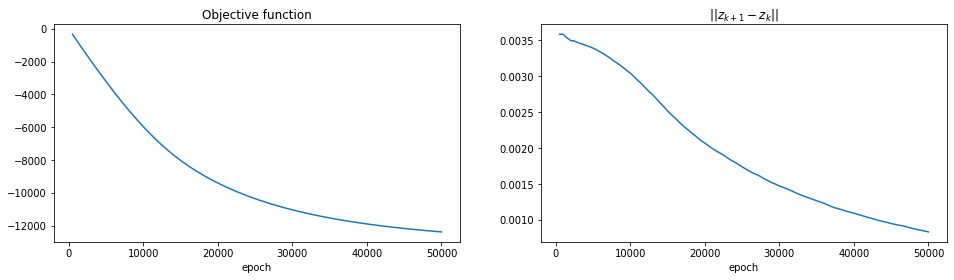

In [44]:
plt.figure(figsize=(16, 4))

plt.subplot(121)
plt.title("Objective function")
plt.xlabel("epoch")
plt.plot(epch_prox, obj_prox)

plt.subplot(122)
plt.title("$||z_{k+1}-z_k||$")
plt.xlabel("epoch")
plt.plot(epch_prox, err)

print("The maximum value is = " + str(-obj_prox[-1]))
print ("Time elapsed  = "+str((end_time_prox - start_time_prox)/60 )+ " min")

#### Comment 
    
   We can see from the visualizations above that running the proximal gradient descent converges for 50 000,the algorithm converges to the optimum which is about 1.23e04.

#### Second Algorithm
<b>Uzawa Algorithm</b>
</div>

#### APPROACH
<p> In order to apply Uzawa Algorithm,we are going to use the following expression defined in Question 3.2:
$$  \operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz$$  </p>

<p>This expression can be written as follows :
$$  \begin{aligned}
\operatorname*{max}_{z \in \mathbb{R}^n} \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz
&=-(-\operatorname*{max}_{z \in \mathbb{R}^n}-(- \operatorname*{min}_{u \in \mathbb{R}} y^Tz -\frac{1}{2\alpha}\Vert x^Tz \Vert^2 - \mathbb{L}_{\tau}^*(z)-ue^Tz)) \\
&=-\operatorname*{min}_{z \in \mathbb{R}^n}\operatorname*{max}_{u \in \mathbb{R}} \frac{1}{2\alpha}\Vert x^Tz \Vert^2 -y^Tz +\mathbb{L}_{\tau}^*(z)+ue^Tz \\
\end{aligned}
$$</p>
<p>In this case our problem can be defined as follows :
$$ \operatorname*{min}_{z \in \mathbb{R}^n}\operatorname*{max}_{u \in \mathbb{R}} \frac{1}{2\alpha}\Vert x^Tz \Vert^2 -y^Tz +\mathbb{L}_{\tau}^*(z)+ue^Tz $$ </p>
<p> This problem can be is equivalent to the following problem : 
$$ \begin{cases} \operatorname*{min}_{z \in \mathbb{R}^n}\frac{1}{2\alpha}\Vert x^Tz \Vert^2 -y^Tz +\mathbb{L}_{\tau}^*(z) \\ 
  s.t\enspace e^Tz = 0       
\end{cases}$$ </p>
<p> Where the Langrangian can be defined as follows:
$$ L(z,u) = \frac{1}{2\alpha}\Vert x^Tz \Vert^2 -y^Tz +\mathbb{L}_{\tau}^*(z)+ue^Tz$$
<p> <b>Uzawa Algorithm</b> can defined as follows : 
    $$ z^{k+1} = \operatorname*{min}_{z \in \mathbb{R}^n } L(z,u^{k})$$
    $$ u^{k+1} = \operatorname*{proj}_{\mathbb{R}}(u^k + \rho^k e^Tz^{k+1}) = u^k + \rho^k e^Tz^{k+1} $$</p>
    
<p> In order to compute $z^{k+1}$ at each iteration, we are going to use proximal gradient descent.In this case we are going to define two functions :
    $$ f(z) = \frac{1}{2\alpha}\Vert x^Tz \Vert^2 -y^Tz +ue^Tz $$
    $$ g(z) = \mathbb{L}_{\tau}^*(z)$$ </p>
<p>As we can see f is a differentiable function, so we can apply proximal gradient descent algorithm.</p>
<p> For each iteration : 
    $$ z^{k+1} = prox_{\gamma g}(z^{k} - \gamma \nabla f(z^{k})) = prox_{\gamma L_{\tau}^*}(z^{k} - \gamma \nabla f(z^{k}))  $$ 

#### Implementation of the Second Algorithm
<b>Uzawa Algorithm</b>
</div>

In [16]:
def grad_f_uzawa(z, u, X=X_train, y=y_train, alpha=alpha):

    """
    Input
    z : an input vector
    u: langrangian parameter
    X_train : training matrix
    y_train : training outputs
    max_iter : number of iterations
    alpha : parameter of the problem 
    
    Ouput
    Gradient vector 
    """
    
    n = len(y)
    e = np.ones(n)
    temp = (1/alpha) * np.dot(X, np.dot(X.T, z)) - y.flatten() + u*e
    return np.reshape(temp, (n,))


def f_uzawa(z, u, X=X_train, y=y_train, alpha=alpha):
    
    """
    Input
    z : an input vector
    u: langrangian parameter
    X_train : training matrix
    y_train : training output
    alpha : parameter of the problem 
    
    Ouput
    Objective function value
    """
  
    res = (0.5/alpha) * np.linalg.norm(np.dot(X.T, z))**2 - \
        np.dot(y.T, z) + u * np.sum(z)
    return res[0]


def uzawa(X=X_train, y=y_train, gamma=gamma, n_iter=100000, alpha=alpha, verbose=False,stopping_eps= 1e-6) :
    """
    Input
    X_train : training matrix
    y_train : training outputs
    gamma : learning rate
    n_iter : number of iterations
    alpha : parameter of the problem 
    
    Ouput
     
    """
    
    z = np.zeros(X.shape[0])
    u = 1
    err_u = []
    err_z = []
    obj = []
    epch = []
    n = X.shape[0]
    if verbose:
        print("Launching Uzawa...")
        print(' | '.join([name.center(8) for name in [
              "it", "norm(Z-Z_old)", "|u-u_old|", "f_uzawa(z)"]]))

    for i in range(n_iter):
        z_old = z
        u_old = u
        z = prox_fenchel(z_old - gamma * grad_f_uzawa(z_old, u_old))
        u = u_old + (1/(i+n)) * np.sum(z)

        if  not (i+1) % 500:
            obj.append(f_uzawa(z, u))
            err_z.append(np.linalg.norm(z-z_old))
            err_u.append(abs(u - u_old))
            epch.append(i+1)
            if verbose : 
                print(' | '.join([("%d" % (i+1)).rjust(8),
                              ("%.2e" % np.linalg.norm(z-z_old)).rjust(13),
                              ("%.2e" % abs(u - u_old)).rjust(9), ("%.2e" % (-f_uzawa(z, u))).rjust(8)]))
        
    return z, u, obj, err_z, err_u, epch


In [45]:
#check gradient before running the algorithm 
print(check_grad(f_uzawa,grad_f_uzawa,z_init,u_init))


0.04771287071462269


#### Comment
The gradient is valid

In [46]:
#Run the second algorithm 
start_time_uzawa = time.time()
z_uzawa,u_uzawa,obj_uzawa,err_z,err_u,epch= uzawa(n_iter=50000,verbose= True )
end_time_uzawa = time.time()

Launching Uzawa...
   it    | norm(Z-Z_old) | |u-u_old| | f_uzawa(z)
     500 |      4.32e-03 |  3.56e-03 | 2.35e+02
    1000 |      3.91e-03 |  4.00e-03 | 7.51e+02
    1500 |      5.45e-03 |  8.89e-04 | 1.06e+03
    2000 |      4.59e-03 |  2.99e-03 | 1.23e+03
    2500 |      3.62e-03 |  4.09e-03 | 1.70e+03
    3000 |      5.28e-03 |  1.34e-03 | 2.04e+03
    3500 |      4.70e-03 |  2.66e-03 | 2.18e+03
    4000 |      3.51e-03 |  4.05e-03 | 2.64e+03
    4500 |      5.19e-03 |  1.41e-03 | 2.98e+03
    5000 |      4.63e-03 |  2.62e-03 | 3.11e+03
    5500 |      3.48e-03 |  3.94e-03 | 3.56e+03
    6000 |      5.18e-03 |  1.12e-03 | 3.87e+03
    6500 |      4.36e-03 |  2.84e-03 | 3.99e+03
    7000 |      3.55e-03 |  3.71e-03 | 4.45e+03
    7500 |      5.18e-03 |  4.63e-04 | 4.69e+03
    8000 |      3.87e-03 |  3.23e-03 | 4.84e+03
    8500 |      3.85e-03 |  3.23e-03 | 5.30e+03
    9000 |      5.06e-03 |  5.63e-04 | 5.43e+03
    9500 |      3.25e-03 |  3.60e-03 | 5.66e+03
   10000 |      4.3

####  Visualization 

The maximum value is = 12398.579172179187
Time elapsed  = 1.048997664451599 min


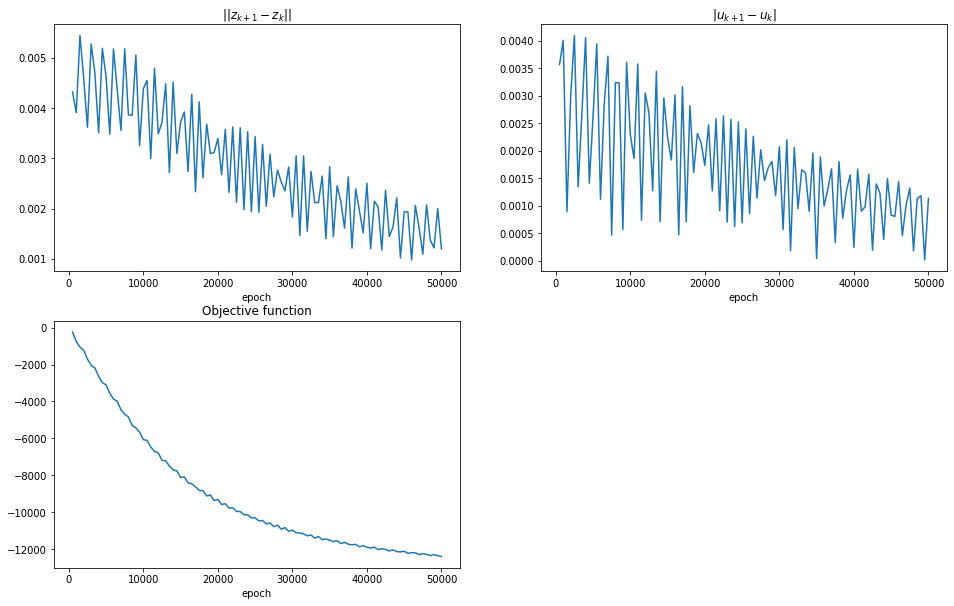

In [47]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
plt.title("$||z_{k+1}-z_k||$")
plt.xlabel("epoch")
plt.plot(epch, err_z)

plt.subplot(222)
plt.title("$|u_{k+1}-u_k|$")
plt.xlabel("epoch")
plt.plot(epch, err_u)

plt.subplot(223)
plt.title("Objective function")
plt.xlabel("epoch")
plt.plot(epch, obj_uzawa)
print("The maximum value is = " + str(-obj_uzawa[-1]))
print ("Time elapsed  = "+str((end_time_uzawa - start_time_uzawa)/60 )+ " min")

#### Comment 
    
Running the uzawa algorithm with 50 000 epochs we can see that it converges since $||z_{k+1}-z_k||$ and $|u_{k+1}-u_k|$ are almost zero and the objective function has decreased  and we also find a close  value the one found by the proximal gradient descent.
We can see also that the objective function did not stop decreasing which means we did not find the optimum yet.Here we can see that we need a good stopping criteria in order to get an accurate optimum which we will do in the next question.

#### Benchmark
<b>1st vs 2nd Algorithm</b>
</div>

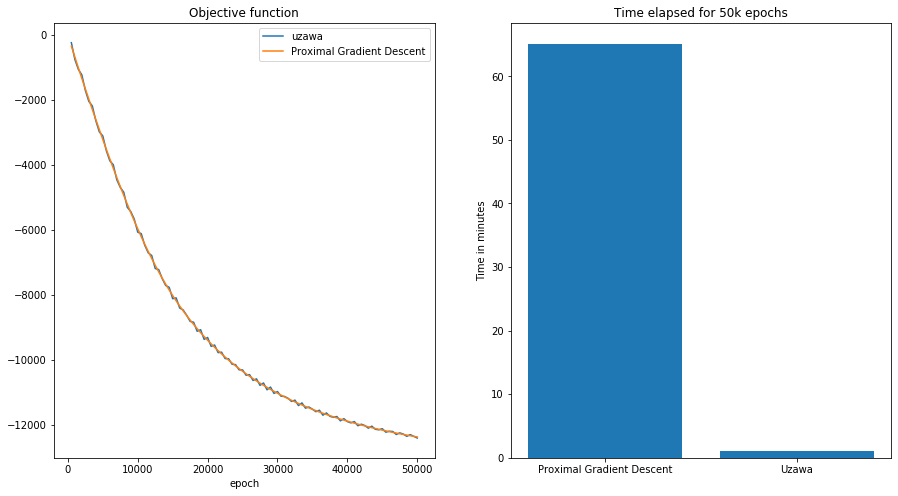

In [59]:
plt.figure(figsize = (15,8))
plt.subplot(121)
plt.title("Objective function")
plt.xlabel("epoch")
plt.plot(epch, obj_uzawa ,label="uzawa")
plt.plot(epch_prox, obj_prox,label ="Proximal Gradient Descent")
plt.legend()
plt.subplot(122)
plt.title("Time elapsed for 50k epochs")
plt.bar(["Proximal Gradient Descent","Uzawa"] ,[(end_time_prox - start_time_prox)/60,(end_time_uzawa - start_time_uzawa)/60 ] )
plt.ylabel("Time in minutes")
plt.show()

#### Comment 
    
We notice that both of the algorthims converge with a close rate except The Proximal Gradient Descent is taking over 60 times more time for the same number of epochs ,this is due to nested loops basically because of the Douglas-Rachford algorithm.

#### Question 3.2
Define a stopping criterion. Why did you choose it?

#### ANSWER 
<p>  As the optimum is unknown for both algorithms, we are going to define the following stopping criteria : </p>
<p>
    $\bullet$ <b> StoppingCriteria : Distance to the Minimum (or Maximum) : </b> </p>
<p> $$ \vert f(z^{k+1}) - f(z^k) \vert < \epsilon $$ $\enspace$ where $\epsilon $ is the tolerance parameter </p>
    
<p> $\bullet$ The first criteria is a standard method as a stopping criteria </p>

#### First Stopping Criteria
$$ \vert f(z^{k+1}) - f(z^k) \vert < \epsilon $$
    Implementation of the uzawa algorithm with the stopping criteria where $\epsilon$ = 1e-06
</div>


####  NB 
We are going to test the stopping criteria only on Uzawa algorithm,as Proximal Gradient Douglas algorithm takes too much time to converge 

In [75]:

def uzawa(X=X_train, y=y_train, gamma=gamma, alpha=alpha, verbose=False,eps= 1e-6) :
    """
    Input
    X_train : training matrix
    y_train : training outputs
    gamma : learning rate
    n_iter : number of iterations
    alpha : parameter of the problem 
    
    Ouput
    z : primal minimizer
    u: dual maximizer
    obj : objective function value
    err_z : distance between primal minimizers vectors at each iteration
    err_u : distance between dual maximizers at each iteration
    epch : epoch
     
    """
    
    z = np.zeros(X.shape[0])
    u = 1
    err_u = []
    err_z = []
    obj = []
    epch = []
    n = X.shape[0]
    if verbose:
        print("Launching Uzawa...")
        print(' | '.join([name.center(8) for name in [
              "it", "norm(Z-Z_old)", "|u-u_old|", "|f_k+1 - f_k|"]]))
    i = 1
    z_old = z
    u_old = u
    z = prox_fenchel(z_old - gamma * grad_f_uzawa(z_old, u_old))
    u = u_old + (1/(i+n)) * np.sum(z)
   
    
    while (abs(f_uzawa(z,u) - f_uzawa(z_old,u_old)) >=eps):
        z_old = z
        u_old = u
        z = prox_fenchel(z_old - gamma * grad_f_uzawa(z_old, u_old))
        u = u_old + (1/(i+n)) * np.sum(z)
        i+= 1
        
        if  not (i+1) % 5000:
            obj.append(f_uzawa(z, u))
            err_z.append(np.linalg.norm(z-z_old))
            err_u.append(abs(u - u_old))
            epch.append(i+1)
            if verbose : 
                print(' | '.join([("%d" % (i+1)).rjust(8),
                              ("%.2e" % np.linalg.norm(z-z_old)).rjust(13),
                              ("%.2e" % abs(u - u_old)).rjust(9), ("%.2e" % abs(f_uzawa(z,u) - f_uzawa(z_old,u_old))).rjust(8)]))
    
    if verbose : 
        print("............Stopping criteria is valid at epoch "+str(i)+ "............")
    return z, u, obj, err_z, err_u, epch


In [77]:
z_uzawa_stp,u_uzawa_stp,obj_uzawa_stp,err_z_stp,err_u_stp,epch_stp= uzawa(eps= 1e-6 ,verbose= True )

Launching Uzawa...
   it    | norm(Z-Z_old) | |u-u_old| | |f_k+1 - f_k|
    5000 |      4.62e-03 |  2.63e-03 | 7.40e-01
   10000 |      4.39e-03 |  2.28e-03 | 6.99e-01
   15000 |      3.72e-03 |  2.23e-03 | 4.03e-01
   20000 |      3.39e-03 |  1.74e-03 | 3.92e-01
   25000 |      3.43e-03 |  6.94e-04 | 5.82e-01
   30000 |      1.83e-03 |  2.07e-03 | 1.69e-01
   35000 |      2.83e-03 |  4.41e-05 | 4.22e-01
   40000 |      2.50e-03 |  2.37e-04 | 3.24e-01
   45000 |      1.93e-03 |  8.31e-04 | 1.30e-01
   50000 |      1.20e-03 |  1.13e-03 | 5.25e-02
   55000 |      1.01e-03 |  1.02e-03 | 5.60e-02
   60000 |      1.21e-03 |  7.16e-04 | 2.10e-02
   65000 |      9.24e-04 |  7.41e-04 | 1.84e-02
   70000 |      5.62e-04 |  7.76e-04 | 5.59e-02
   75000 |      1.15e-03 |  2.04e-04 | 6.48e-02
   80000 |      5.50e-04 |  6.00e-04 | 3.10e-02
   85000 |      1.00e-03 |  1.08e-05 | 5.27e-02
   90000 |      6.58e-04 |  3.93e-04 | 1.00e-03
   95000 |      3.64e-04 |  4.64e-04 | 2.43e-02
............Stop

#### Question 3.2
Compare the performance of the algorithms you implemented on the census dataset with
$\tau$ = 0.7 and test size=0.33.

In [3]:
X_train, X_test, y_train, y_test = load_data(test_size=0.33)
print('Data shape is :',X_train.shape)

Data shape is : (3375042, 10)


#### Comment 
For 0.33 ,the problem requires better cpu performance than ours, since 100 iterations in uzawa algorithm consumes about 5 min
an access to a cloud server could have given us an idea about the performance since 0.33 of the data is a huge amount for our pc (about 3.3 1e6 row).
However,as we can see both algorithms converge to the solution.However Uzawa algorithm takes less time than Proximal Gradient Douglas algorithm